# Multiple Linear Regression & Backward Elimination Template

## ======= Import the data set =======

In [1]:
import pandas as pd
dataset = pd.read_csv('50_Startups.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## ========= Encoding categorical data ========

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
print ('The categorical features are', set(dataset.iloc[:, 3]))
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
x = onehotencoder.fit_transform(x).toarray()
x = x[:, 1:] #dealing with the dummy variable trap

The categorical features are {'California', 'New York', 'Florida'}


/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## ====== Splitting the dataset ============

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## ====== Fitting the multiple linear regression model to the data ===

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## ====== Predict the test sets results =======

y_pred = regressor.predict(x_test)

## ====== Backward Elimination ======

In [5]:
import statsmodels.formula.api as sm
import numpy as np
x = np.append(arr = np.ones((50, 1)).astype(int), values = x, axis = 1) #the constant b in the model
x_opt = x[:, [0, 1, 2, 3, 4, 5]]
regressor_ols = sm.OLS(y, x_opt).fit()
regressor_ols.summary() #remove column 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           1.34e-27
Time:                        13:43:57   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000      3.62e+04   6.4e+04
x1           198.7888   3371.007      0.059      0.953     -6595.030  6992.607
x2           -41.8870   3256.039     -0.013      0.990     -6604.003  6520.229
x3             0.8060      0.046     17.369      0.000         0.712     0.900
x4            -0.0270      0.052     -0.517      0.608        -0.132     0.078
x5             0.0270      0.017      1.574      0.123        -0.008     0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
x_opt = x[:, [0, 1, 3, 4, 5]]
regressor_ols = sm.OLS(y, x_opt).fit()
regressor_ols.summary() #remove column 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           8.49e-29
Time:                        13:43:57   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000      3.67e+04  6.35e+04
x1           220.1585   2900.536      0.076      0.940     -5621.821  6062.138
x2             0.8060      0.046     17.606      0.000         0.714     0.898
x3            -0.0270      0.052     -0.523      0.604        -0.131     0.077
x4             0.0270      0.017      1.592      0.118        -0.007     0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
x_opt = x[:, [0, 3, 4, 5]]
regressor_ols = sm.OLS(y, x_opt).fit()
regressor_ols.summary() #remove column 4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           4.53e-30
Time:                        13:43:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000      3.69e+04  6.34e+04
x1             0.8057      0.045     17.846      0.000         0.715     0.897
x2            -0.0268      0.051     -0.526      0.602        -0.130     0.076
x3             0.0272      0.016      1.655      0.105        -0.006     0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
x_opt = x[:, [0, 3, 5]]
regressor_ols = sm.OLS(y, x_opt).fit()
regressor_ols.summary() #remove column 5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           2.16e-31
Time:                        13:43:57   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000      4.16e+04  5.24e+04
x1             0.7966      0.041     19.266      0.000         0.713     0.880
x2             0.0299      0.016      1.927      0.060        -0.001     0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
x_opt = x[:, [0, 3]]
regressor_ols = sm.OLS(y, x_opt).fit()
regressor_ols.summary() #final model? no, as the adjusted R-squared is lowered than the 
                        #previous one, but the current one is good enough. Based on the 
                        #current model, we can make the following plot

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           3.50e-32
Time:                        13:43:57   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000      4.39e+04  5.41e+04
x1             0.8543      0.029     29.151      0.000         0.795     0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ====== Visualizing (reduced dimension ~ 1) =======

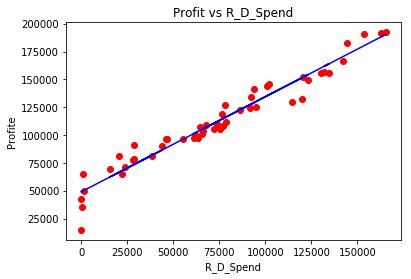

In [10]:
regressor = LinearRegression()
regressor.fit(x[:, 3:4], y)
y_pred = regressor.predict(x[:, 3:4])
import matplotlib.pyplot as plt
plt.scatter(x[:, 3], y, color = 'red') #keyword color can not be neglected.
plt.plot(x[:, 3], y_pred, color='blue')
plt.title('Profit vs R_D_Spend')
plt.xlabel('R_D_Spend')
plt.ylabel('Profite')
plt.show() 